Data Preprocessing:

The Titanic dataset is loaded, preprocessed by converting categorical features into numerical ones (e.g., 'Sex'), and features are standardized for better performance during optimization.
Logistic Regression with L1 Regularization:

The logistic regression model is modified to include L1 regularization (Lasso), which induces sparsity in the weights.
Subgradient Descent is used to optimize the loss function, which consists of the binary cross-entropy loss along with the L1 regularization term.
The subgradient is computed as the gradient of the logistic loss combined with the subgradient of the L1 regularization term (sign of the weights).
Training and Evaluation:

The model is trained using subgradient descent, and predictions are made on the test set.
The accuracy on the test set is printed, and a loss curve over epochs is plotted to visualize convergence.

Epoch 0, Loss: 0.6924
Epoch 100, Loss: 0.6549
Epoch 200, Loss: 0.6331
Epoch 300, Loss: 0.6199
Epoch 400, Loss: 0.6117
Epoch 500, Loss: 0.6064
Epoch 600, Loss: 0.6030
Epoch 700, Loss: 0.6009
Epoch 800, Loss: 0.5996
Epoch 900, Loss: 0.5985

Accuracy on test set: 0.7416


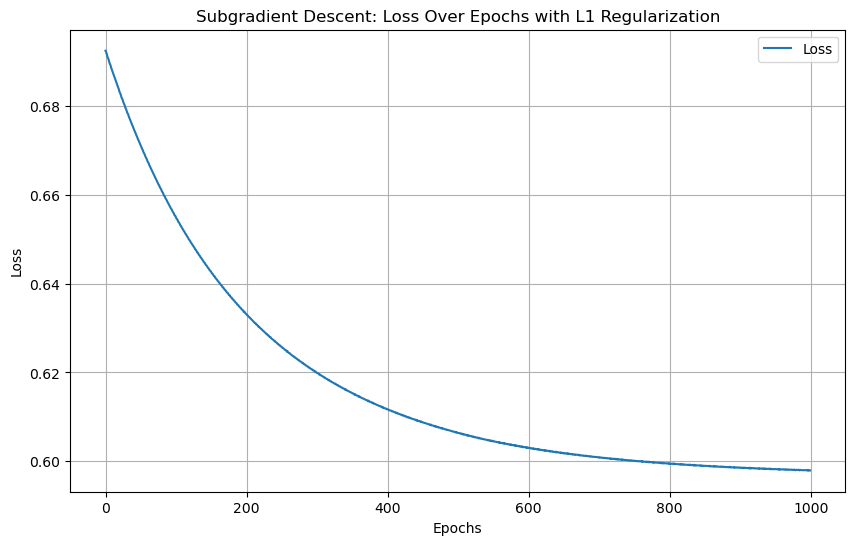

In [1]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with L1 regularization (Subgradient Descent)
class LogisticRegressionSubgradient:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_reg=0.1):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - learning_rate: The step size for subgradient descent.
        - epochs: The number of iterations over the dataset.
        - lambda_reg: Regularization strength for L1 (Lasso).
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_reg = lambda_reg
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss with L1 regularization.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Compute the binary cross-entropy loss
        log_loss_value = log_loss(y, predictions)
        # Add L1 regularization term
        reg_term = self.lambda_reg * np.sum(np.abs(self.weights))
        total_loss = log_loss_value + reg_term
        return total_loss

    def subgradient(self, X, y):
        """
        Compute the subgradient of the loss function with respect to weights.
        The subgradient includes the gradient of the loss and the subgradient of the L1 regularization term.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        error = predictions - y
        # Gradient with respect to weights (Binary Cross-Entropy)
        dw = np.dot(X.T, error) / len(y)
        
        # Subgradient of L1 regularization (sign of the weights)
        dw_reg = self.lambda_reg * np.sign(self.weights)
        
        # Subgradient of the loss function
        dw_total = dw + dw_reg
        db = np.sum(error) / len(y)  # Gradient with respect to bias
        return dw_total, db

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Subgradient Descent with L1 regularization.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Subgradient Descent loop
        for epoch in range(self.epochs):
            # Compute subgradients
            dw, db = self.subgradient(X, y)
            
            # Update weights and bias using the subgradients
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using Subgradient Descent and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionSubgradient(learning_rate=0.01, epochs=1000, lambda_reg=0.1)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Subgradient Descent: Loss Over Epochs with L1 Regularization")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


# Diminishing alpha

Epoch 0, Loss: 0.6918
Epoch 100, Loss: 0.6163
Epoch 200, Loss: 0.5855
Epoch 300, Loss: 0.5678
Epoch 400, Loss: 0.5559
Epoch 500, Loss: 0.5472
Epoch 600, Loss: 0.5405
Epoch 700, Loss: 0.5351
Epoch 800, Loss: 0.5306
Epoch 900, Loss: 0.5268

Accuracy on test set: 0.7303


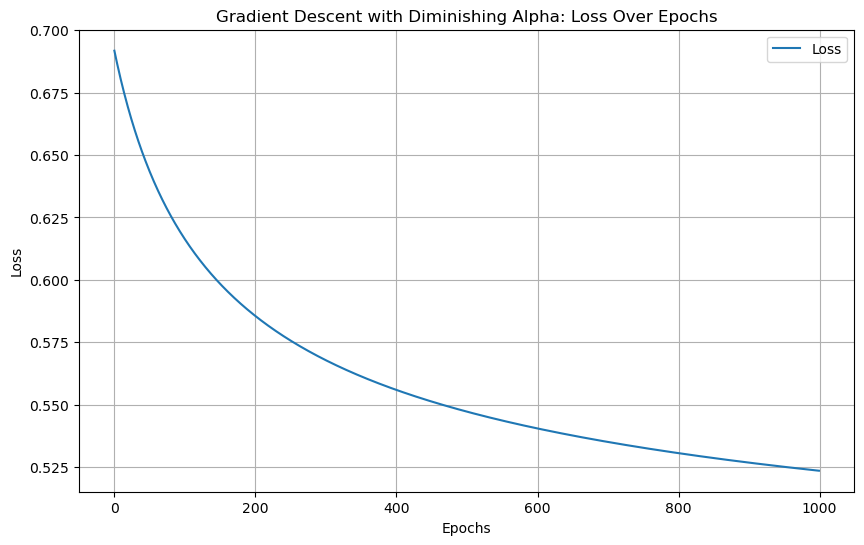

In [2]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Gradient Descent and Diminishing Learning Rate
class LogisticRegressionDiminishingAlpha:
    def __init__(self, alpha_0=0.01, epochs=1000, lambda_decay=0.01):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - alpha_0: The initial learning rate.
        - epochs: The number of iterations over the dataset.
        - lambda_decay: The rate at which the learning rate decays.
        """
        self.alpha_0 = alpha_0
        self.epochs = epochs
        self.lambda_decay = lambda_decay
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Gradient Descent with Diminishing Learning Rate.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights, bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Gradient Descent loop with diminishing learning rate
        for epoch in range(self.epochs):
            # Step 1: Calculate predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # Step 2: Compute gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
            db = np.sum(error) / len(y)       # Gradient with respect to bias
            
            # Step 3: Compute the learning rate with diminishing alpha
            alpha_t = self.alpha_0 / (1 + self.lambda_decay * epoch)
            
            # Step 4: Update weights and bias using the learning rate
            self.weights -= alpha_t * dw
            self.bias -= alpha_t * db
            
            # Step 5: Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using Diminishing Alpha and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionDiminishingAlpha(alpha_0=0.01, epochs=1000, lambda_decay=0.01)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Gradient Descent with Diminishing Alpha: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


# Contour graph
Steps:
Preprocess the Titanic dataset and select "Age" and "Fare" as the features.
Train a logistic regression model.
Generate a grid of points to plot the decision boundary.
Plot the contour graph using the model's predictions.

Explanation:
Data Preprocessing:

We load the Titanic dataset and drop the Name column.
We handle missing values by dropping rows with NaN values for relevant columns ("Age", "Fare", "Survived").
We map the Sex column to numerical values (0 for male, 1 for female).
We extract "Age" and "Fare" as the features and standardize them using StandardScaler.
Logistic Regression:

We train a Logistic Regression model using the standardized "Age" and "Fare" features.
Contour Plot:

We create a grid of points in the feature space using np.meshgrid and predict the labels for these points using the trained logistic regression model.
We plot the decision boundary using the contour plot where different regions represent different predicted classes (Survived or Not Survived).
The data points are plotted as scatter points with different colors based on their true labels.
Output:
The contour plot will show how the logistic regression model divides the feature space into regions where the predicted class (Survived or Not Survived) changes based on "Age" and "Fare".
The data points will be overlaid on this plot to visualize how well the model classifies them.

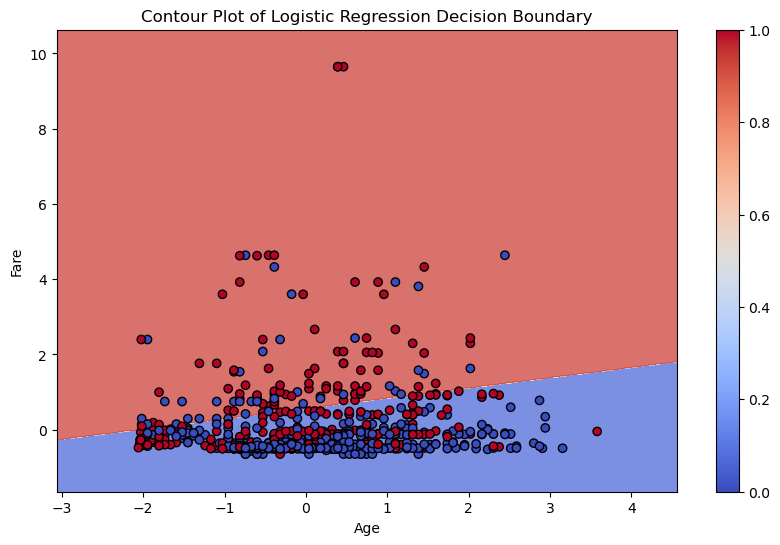

In [3]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column and rows with missing values
    df.drop(columns=['Name'], inplace=True)
    df.dropna(subset=['Age', 'Fare', 'Survived'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Select only "Age" and "Fare" as features for visualization
    X = df[['Age', 'Fare']].values
    y = df['Survived'].values
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Train a Logistic Regression model
def train_logistic_regression(X, y):
    model = LogisticRegression()
    model.fit(X, y)
    return model

# Plot contour graph
def plot_contour(X, y, model):
    # Create a grid of points
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict labels for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour graph
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', marker='o')
    plt.title('Contour Plot of Logistic Regression Decision Boundary')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.colorbar()
    plt.show()

# Load and preprocess the data
X, y = load_and_preprocess_data()

# Train the Logistic Regression model
model = train_logistic_regression(X, y)

# Plot the contour graph
plot_contour(X, y, model)


Subgradient Method: In subgradient descent, instead of using the true gradient, we use a subgradient of the function. The key difference is that subgradients can exist for non-differentiable functions (like L1 norm).
Diminishing Learning Rate: The learning rate is set to decay over time, which helps in preventing the algorithm from overshooting and converging more smoothly.
Plotting the Loss: We will track the loss during each iteration and plot it to show how the subgradient method with diminishing learning rate converges over time.
Subgradient Diminishing Code Example
In the following code, we will:

Use a simple convex function for demonstration (e.g., L1 regularization).
Implement subgradient descent with a diminishing learning rate.
Track and plot the loss over time.

# Subgradient Diminishing Code Example
In the following code, we will:

Use a simple convex function for demonstration (e.g., L1 regularization).
Implement subgradient descent with a diminishing learning rate.
Track and plot the loss over time.

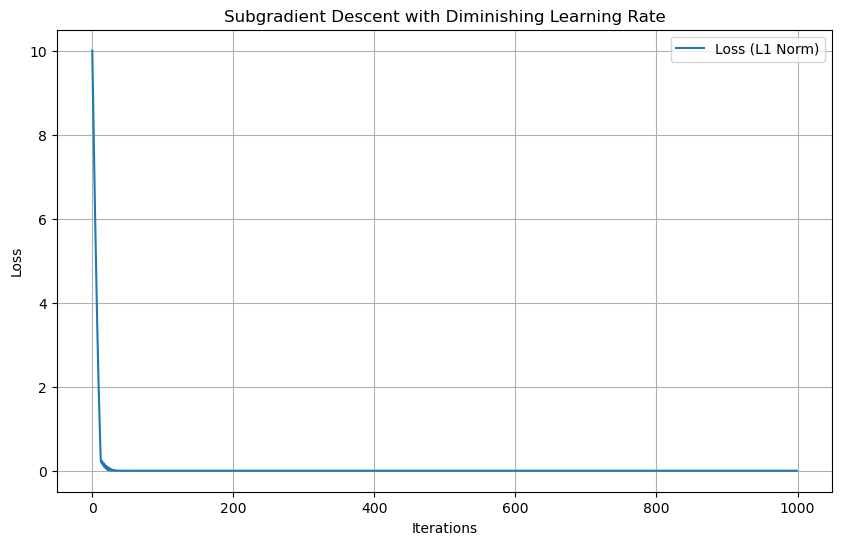

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple function to minimize (L1 norm loss function for simplicity)
def l1_loss(w):
    """
    L1 loss function (for simplicity, using a mock example).
    Here, we just use the sum of absolute values of the weights.
    """
    return np.sum(np.abs(w))

# Subgradient function for L1 loss (derivative does not exist, so we use subgradient)
def subgradient_l1(w):
    """
    Subgradient of the L1 loss function (sign of weights).
    """
    return np.sign(w)

# Subgradient Descent with Diminishing Learning Rate
def subgradient_diminishing(num_iterations=1000, initial_w=10, decay_rate=0.01):
    """
    Performs subgradient descent with a diminishing learning rate.
    """
    # Initialize variables
    w = initial_w
    learning_rate = 1.0  # Initial learning rate
    losses = []
    
    for t in range(1, num_iterations + 1):
        # Compute the loss at the current weight
        loss = l1_loss(w)
        losses.append(loss)
        
        # Compute the subgradient
        grad = subgradient_l1(w)
        
        # Update the weight using the subgradient and the learning rate
        w = w - learning_rate * grad
        
        # Diminish the learning rate over time
        learning_rate = learning_rate / (1 + decay_rate * t)
    
    return losses

# Run the subgradient descent algorithm
losses = subgradient_diminishing(num_iterations=1000, initial_w=10, decay_rate=0.01)

# Plot the loss over time
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Loss (L1 Norm)')
plt.title('Subgradient Descent with Diminishing Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()



Expected Output:
A plot will show the decrease in the loss function over time, illustrating how the algorithm converges with diminishing learning rates.